#### LetsGrowMore Data Science Inter - Kumar Gaurav

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
from IPython.display import HTML
import warnings
%matplotlib inline

In [2]:
# Fetching the dataset
df=pd.read_csv('../Iris_DT/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Head of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of dataset
df.shape

(150, 6)

In [5]:
# 3 types of Species
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Label Encoding 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [6]:
df.Species.unique()
#Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

report=sv.analyze(source=df)
report.show_html('Iris Report')

#### Missing values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Visualization EDA

/home/gaurav/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


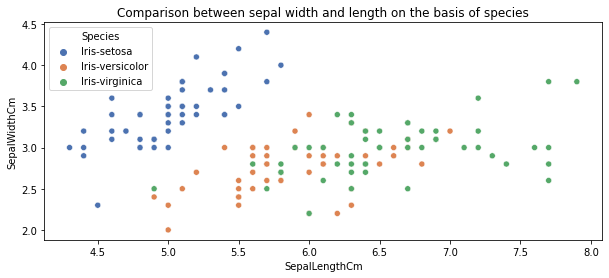

In [8]:
plt.figure(figsize=(10,4))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

/home/gaurav/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


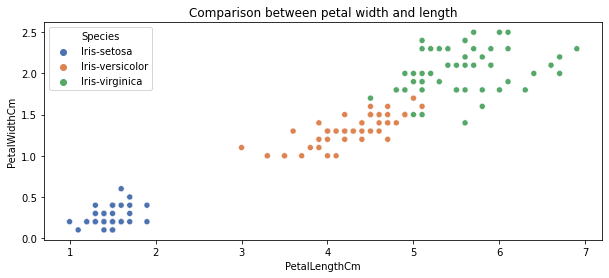

In [9]:
plt.figure(figsize=(10,4))
plt.title('Comparison between petal width and length')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

<AxesSubplot:>

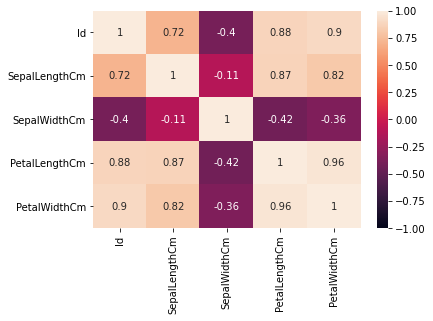

In [10]:
#correlation between features
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

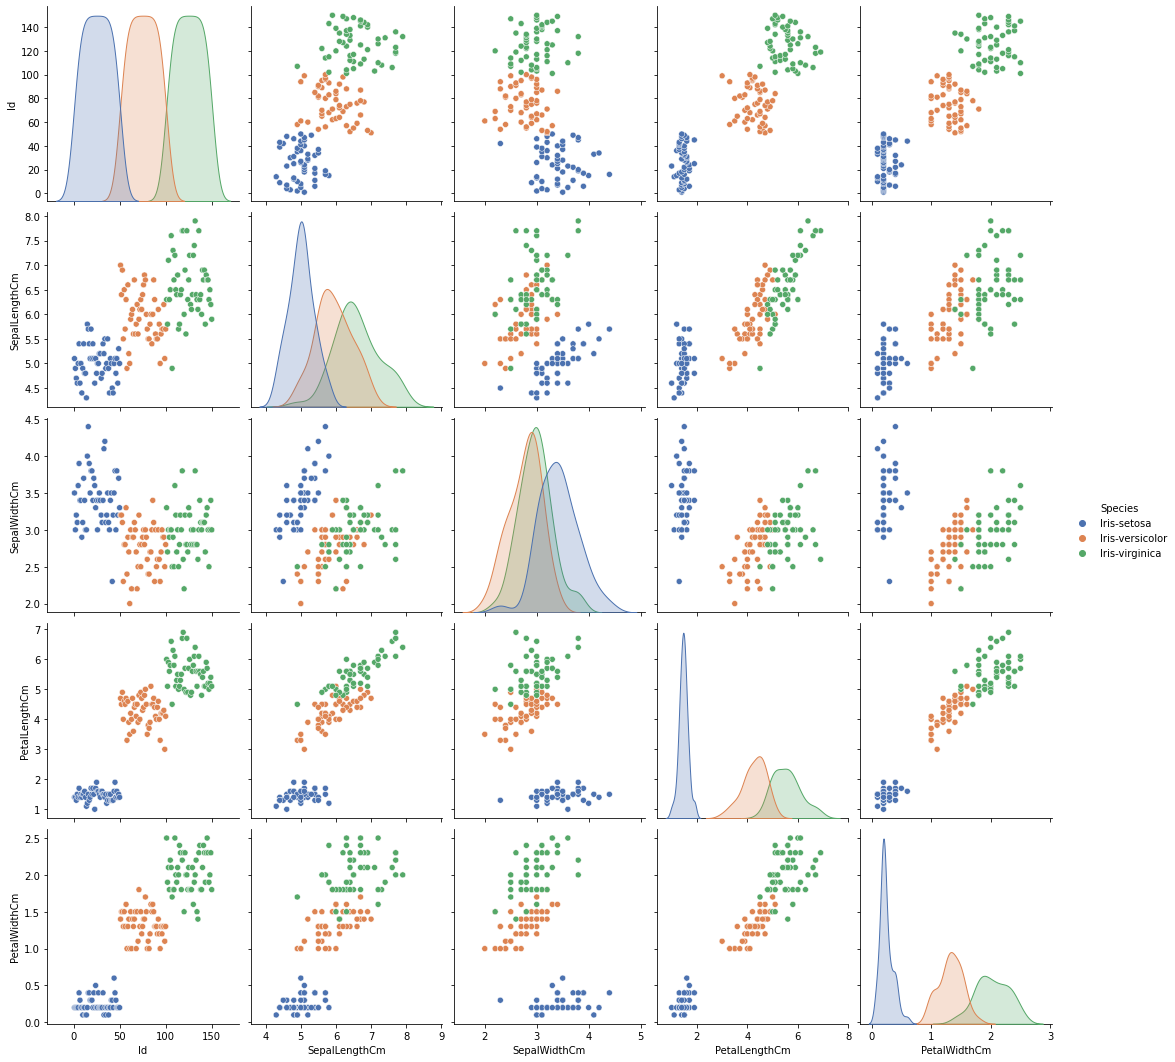

In [11]:
#Pairplot of Species
sns.pairplot(df,hue="Species",height=3,palette='deep')

In [12]:
#Seperate Dependent and Independent Features

#For Dependent feature we use 'y' variable
y=df['Species']

#For Indenpendent feature we use 'X' variable
x=df.drop(['Id','Species'],axis=1)

In [13]:
x.shape,y.shape

((150, 4), (150,))

In [14]:
#Spliting into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()

In [16]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
# Feature Importance
classifier.feature_importances_

array([0.02150464, 0.02150464, 0.40406279, 0.55292793])

In [18]:
for feature, index in zip(x, range(4)):
    print(feature,':',classifier.feature_importances_[index])

SepalLengthCm : 0.021504642271982528
SepalWidthCm : 0.021504642271982528
PetalLengthCm : 0.4040627854898855
PetalWidthCm : 0.5529279299661496


In [19]:
y_pred=classifier.predict(x_test)

In [20]:
y_actual=np.array(y_test)

In [21]:
print(np.round(classifier.score(x_test,y_test)*100,2),'%')

97.78 %


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_actual,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [23]:
print(classification_report(y_actual,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



#### Visualisation of Decision Tree

In [24]:
from sklearn.tree import export_text
text_representation = export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: Iris-setosa
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: Iris-virginica



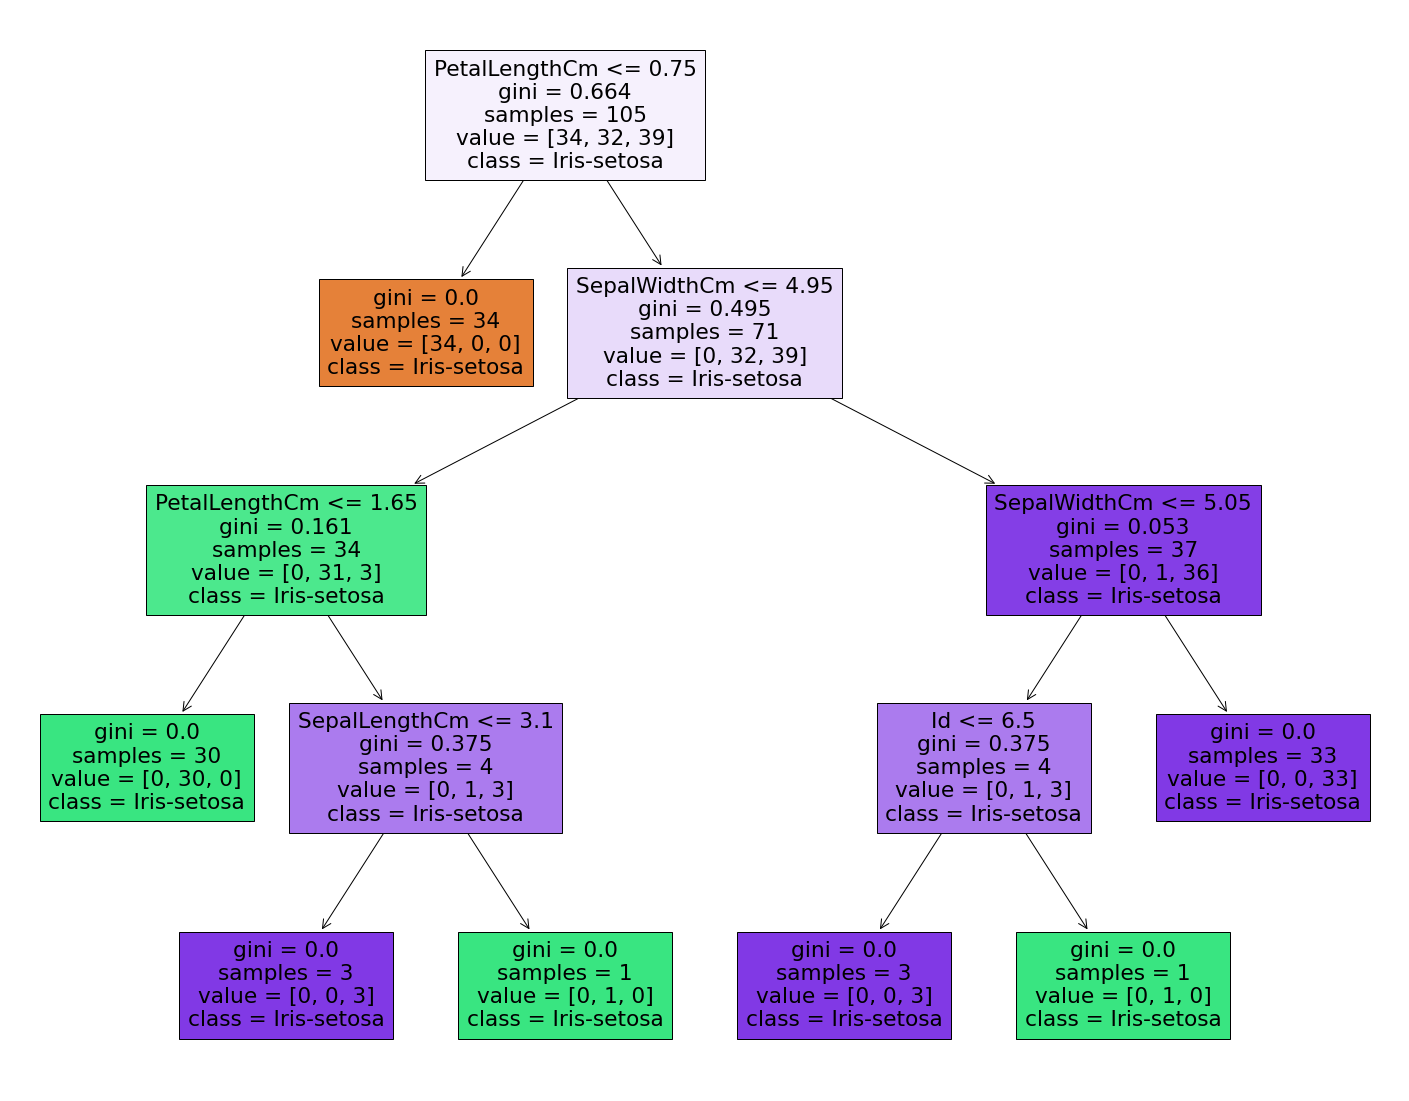

In [25]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=df.columns,  
                   class_names=df.Species,
                   filled=True)

#### From here we found that our model predicts 97.78% of accuracy.

#### Thanks